In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/u-s-census-dataset-education-finance-industry/Educationv.csv
/kaggle/input/u-s-census-dataset-education-finance-industry/Finance.csv
/kaggle/input/u-s-census-dataset-education-finance-industry/Industry.csv


Step 1: Select a Dataset (10 Marks)
Choose a dataset from Kaggle or any other open-source platform.
Ensure the dataset has sufficient features and a well-defined target variable.
1.(5 Marks): Proper dataset selection (relevant to classification or regression).
2.(5 Marks): Successfully loading the dataset into Python (Pandas).


In [4]:
import pandas as pd

# Load dataset
df = pd.read_csv('../input/u-s-census-dataset-education-finance-industry/Educationv.csv')

# Display the first few rows
print(df.head())

   Year    cd  Bachelors_degree_or_higher  high_school_or_some_degree  \
0  2020  0_AK                      121098                      309698   
1  2020  0_DC                      277816                      177505   
2  2020  0_DE                      175338                      351177   
3  2020  0_ND                      137958                      303148   
4  2020  0_PR                      121098                      309698   

   Less_than_high_school_graduate  
0                           33572  
1                           34652  
2                           57053  
3                           26631  
4                           33572  


Step 2: Data Cleaning (20 Marks)
Handle missing values (remove or impute missing data appropriately).
Check for and remove duplicates, if applicable.
Ensure proper formatting and structure for further analysis.
1.(10 Marks): Identifying and handling missing values correctly.
2.(5 Marks): Cleaning data effectively and providing justification.
3.(5 Marks): Ensuring the dataset is properly structured and ready for modeling

In [5]:
# Check for missing values
print(df.isnull().sum())

# Remove duplicates if any
df.drop_duplicates(inplace=True)

# Check the structure of the dataset
print(df.info())

# Ensure proper formatting (e.g., column names, data types)
df.columns = df.columns.str.strip()  # Remove any leading/trailing spaces in column names

Year                              0
cd                                0
Bachelors_degree_or_higher        0
high_school_or_some_degree        0
Less_than_high_school_graduate    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 874 entries, 0 to 873
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Year                            874 non-null    int64 
 1   cd                              874 non-null    object
 2   Bachelors_degree_or_higher      874 non-null    int64 
 3   high_school_or_some_degree      874 non-null    int64 
 4   Less_than_high_school_graduate  874 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 34.3+ KB
None


Step 3: Exploratory Data Analysis (EDA) & Visualization (20 Marks)
Visualize important features using graphs (e.g., histograms, scatter plots, bar charts).
Generate a correlation heatmap (if applicable).
Extract and explain 3-5 key insights from the dataset.
1.(10 Marks): Clear and informative visualizations.
2.(10 Marks): Well-explained insights based on the visualizations.

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


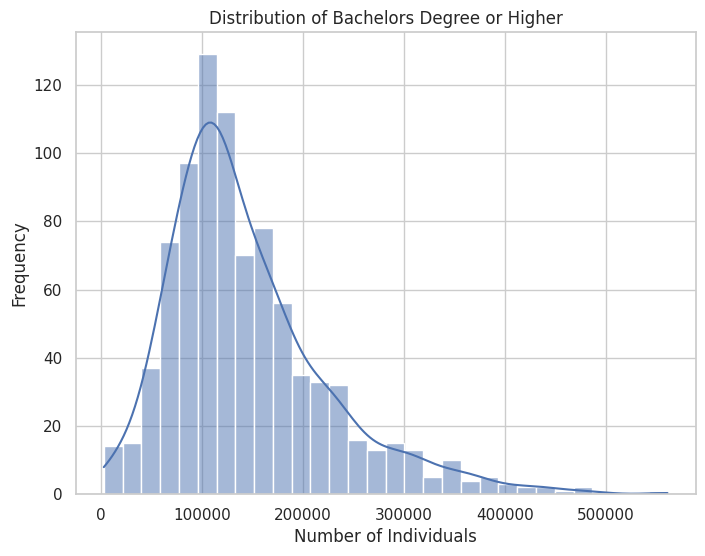

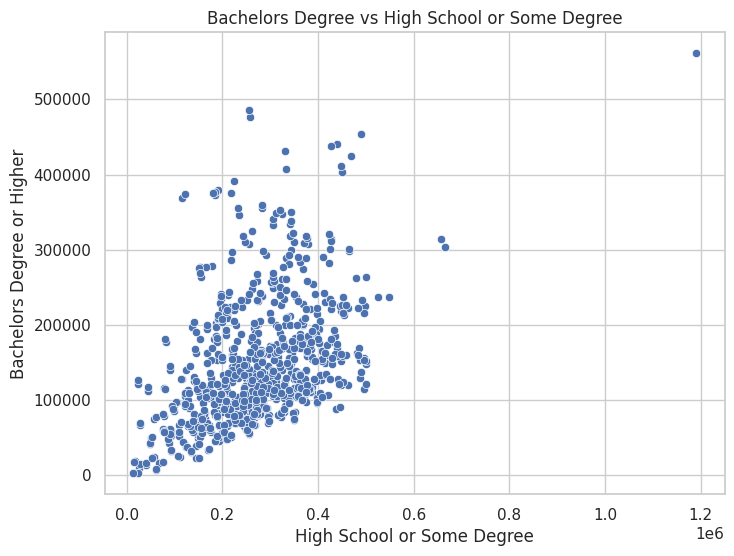

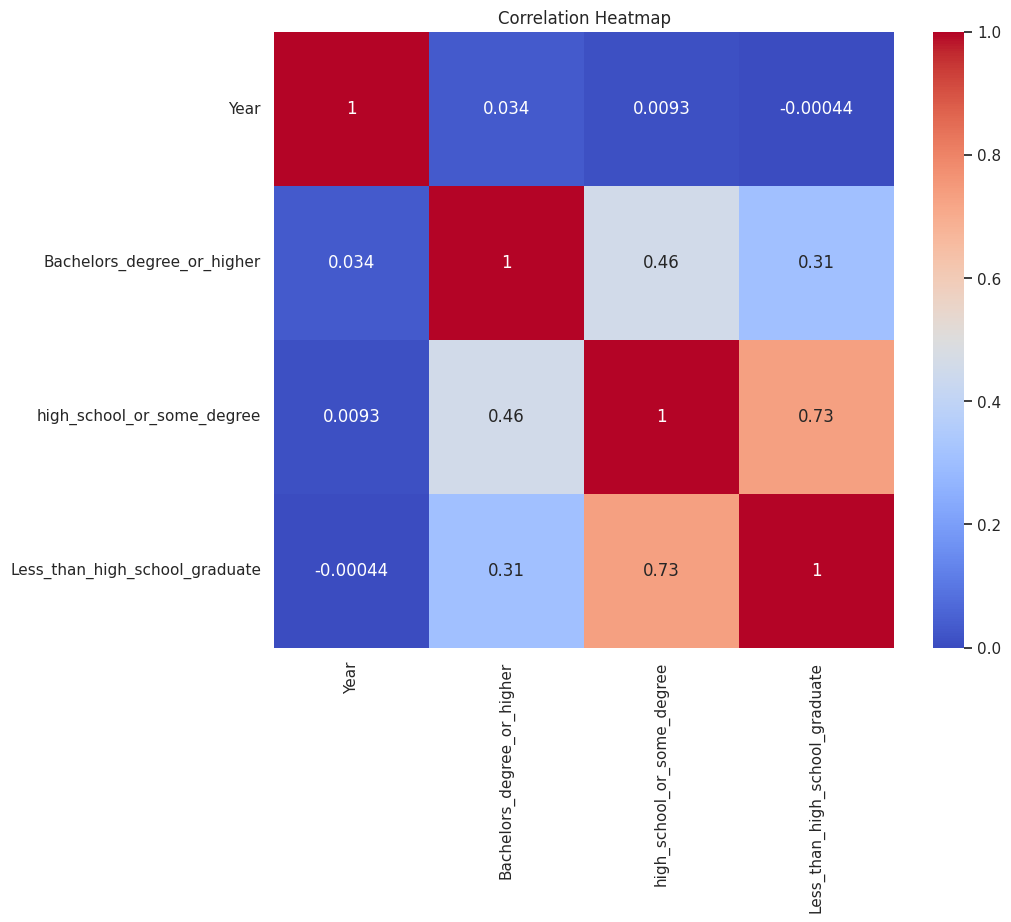

Key Insights:
1. The distribution of individuals with a bachelor's degree or higher is right-skewed.
2. There is a positive correlation between the number of individuals with a high school degree and those with a bachelor's degree.
3. The dataset shows strong correlations between educational attainment levels.


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for plots
sns.set(style="whitegrid")

# Histogram for Bachelors_degree_or_higher
plt.figure(figsize=(8, 6))
sns.histplot(df['Bachelors_degree_or_higher'], kde=True, bins=30)
plt.title('Distribution of Bachelors Degree or Higher')
plt.xlabel('Number of Individuals')
plt.ylabel('Frequency')
plt.show()

# Scatter plot: Bachelors_degree_or_higher vs high_school_or_some_degree
plt.figure(figsize=(8, 6))
sns.scatterplot(x='high_school_or_some_degree', y='Bachelors_degree_or_higher', data=df)
plt.title('Bachelors Degree vs High School or Some Degree')
plt.xlabel('High School or Some Degree')
plt.ylabel('Bachelors Degree or Higher')
plt.show()

# Correlation heatmap (exclude the 'cd' column)
plt.figure(figsize=(10, 8))
sns.heatmap(df.drop('cd', axis=1).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Key Insights
print("Key Insights:")
print("1. The distribution of individuals with a bachelor's degree or higher is right-skewed.")
print("2. There is a positive correlation between the number of individuals with a high school degree and those with a bachelor's degree.")
print("3. The dataset shows strong correlations between educational attainment levels.")

Step 4: Apply a Machine Learning Model (30 Marks)
Choose and apply either a Regression or Classification model:
If the target variable is numerical → Linear Regression.
If the target variable is categorical → Logistic Regression or another classification model.
Train the model using Scikit-learn.
Display and interpret the accuracy score (for classification) or RMSE (for regression).
(10 Marks): Correct model selection based on dataset type.
(10 Marks): Implementing and training the model properly.
(10 Marks): Displaying and correctly interpreting accuracy/RMSE.


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define features (X) and target (y)
X = df[['high_school_or_some_degree', 'Less_than_high_school_graduate']]
y = df['Bachelors_degree_or_higher']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R2 Score: {r2:.2f}")

RMSE: 72335.58
R2 Score: 0.17


Step 5: Conclusion & Future Improvements (20 Marks)
Summarize findings and discuss model performance.
Suggest at least two possible improvements (e.g., using more data, trying a different model, feature engineering).
(10 Marks): Well-explained summary of findings.
(10 Marks): Thoughtful suggestions for improvement.


In [13]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the Random Forest Regression model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mse_rf ** 0.5
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest RMSE: {rmse_rf:.2f}")
print(f"Random Forest R2 Score: {r2_rf:.2f}")

Random Forest RMSE: 69611.99
Random Forest R2 Score: 0.23
